In [217]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

## Accuracy Of Using Multinomial Logistic Regression
The objective of this section is to compare the test accuracy and training accuracy of Multinomial Logistic Regression with other methods including XGBoost and Neural Network.

In [218]:
music_data = pd.read_csv("features_30_sec.csv") 

## converting the categorical labels into numerical labels, 0-9
music_data['label'] = preprocessing.LabelEncoder().fit_transform(music_data['label'])

## dropping label & filename since it won't be used in our model
x = music_data.drop(['label','filename'], axis=1) # axis=1 means column
y = music_data['label']

## store all column names of x
cols = x.columns 

## each col of data -> seperate array
np_scaled = preprocessing.MinMaxScaler().fit_transform(x) 

## new data frame with the new scaled data. 
x = pd.DataFrame(np_scaled, columns=cols)

## test_size=0.2 means that 20% of data will be used for testing, and 80% for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1000)

### Multinomial Logistic Regression

In [219]:
## initialize the Logistic Regression classifier
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

## trains the Logistic Regression classifier on the training data
lr.fit(x_train, y_train)

## after training the classifier, it makes predictions on the test dataset
lr_preds = lr.predict(x_test)

print("Logistic Regression:", accuracy_score(lr_preds, y_test))

Logistic Regression: 0.7


### XGBoost


In [220]:
num_classes = len(set(y_train))

## initialize the XGB
xgb = XGBClassifier(num_class=num_classes, n_estimators=150, learning_rate=0.1)

## trains XGB on the training data
xgb.fit(x_train, y_train)

## after training the classifier, it makes predictions on the test dataset
xgb_preds = xgb.predict(x_test)

# Evaluate the model's accuracy
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

XGBoost Accuracy: 0.78


### Neural Network

In [221]:
num_classes = len(set(y_train))

## creates a sequential model, which allows you to build a neural network one layer at a time
model = Sequential()


model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))  
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is the number of classes

## compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## one-hot encode the target labels
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

model.fit(x_train, y_train_onehot, epochs=100, batch_size=32, validation_data=(x_test, y_test_onehot), verbose=0)

print("Neural Network Accuracy:", model.evaluate(x_test, y_test_onehot, verbose=0)[1])


Neural Network Accuracy: 0.7450000047683716


### Comparision of Accuracy for Different Methods

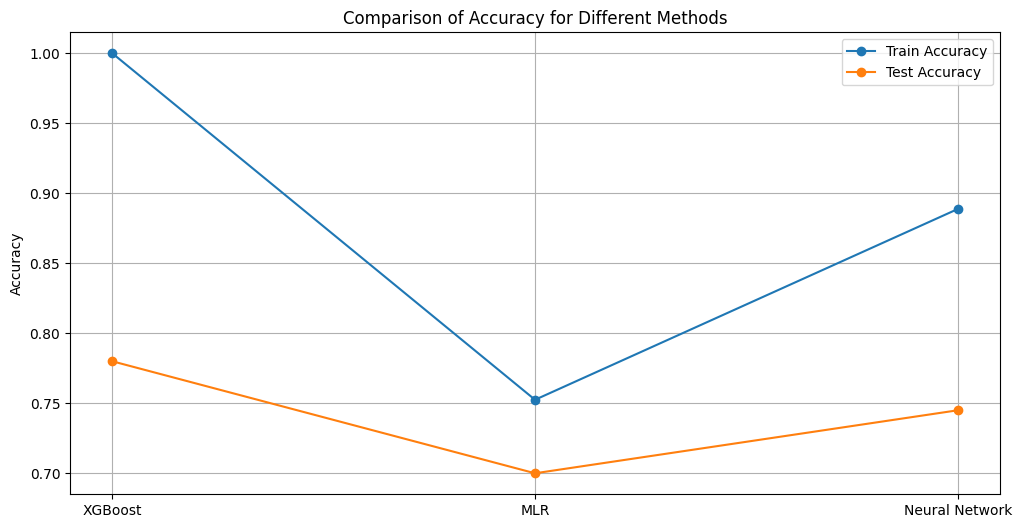

In [222]:
xgb_train_preds = xgb.predict(x_train)
xgb_test_preds = xgb.predict(x_test)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)


lr_train_preds = lr.predict(x_train)
lr_test_preds = lr.predict(x_test)
lr_train_accuracy = accuracy_score(y_train, lr_train_preds)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)


nn_train_accuracy = model.evaluate(x_train, y_train_onehot, verbose=0)[1]
nn_test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)[1]

## plot the accuracy comparison
methods = ['XGBoost', 'MLR', 'Neural Network']
train_accuracies = [xgb_train_accuracy, lr_train_accuracy, nn_train_accuracy]
test_accuracies = [xgb_test_accuracy, lr_test_accuracy, nn_test_accuracy]

plt.figure(figsize=(12, 6))
plt.plot(methods, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(methods, test_accuracies, label='Test Accuracy', marker='o')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Methods')
plt.legend()
plt.grid(True)
plt.show()


### Why MLR might not be the best choice ?
Multinomial Logistic Regression (MLR) may not be as accurate as XGBoost and Neural Networks in certain situations due to its inherent limitations:
- MLR assumes linear relationships between the input features and the target classes. In cases where the underlying relationships are highly non-linear, MLR may not capture complex patterns in the data. XGBoost and Neural Networks can model non-linear relationships much more effectively.
- MLR may struggle with very large datasets or highly complex data. In contrast, XGBoost and Neural Networks can be scaled and adapted to accommodate
- XGBoost and Neural Networks offer more hyperparameter tuning flexibility, allowing fine-tuning of the model's performance. MLR has fewer hyperparameters to adjust

So, the choice of method depends on the nature of the problem, the quality and quantity of data, the trade-off between model complexity and interpretability, and the available computational resources. Multinomial Logistic Regression (MLR) can be a suitable option for relatively simple classification tasks with linearly separable classes and a requirement for interpretability. However, for tasks that involve complex relationships or require high predictive accuracy, MLR might not be the best choice.